<h2> II. Programming and critical analysis [11v]
                           
<h4> In the next exercise you will use the accounts.csv dataset. This dataset contains account details
of bank clients, and the target variable yis binary (‘has the client subscribed a term deposit?’).
Select the first 8 features and remove duplicates and null values.


<h5>Hint: You can use get_dummies() to change the feature type (e.g. pd.get_dummies(data,
drop_first=True)).



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('accounts.csv')
x = data.drop('deposit', axis=1)
y = data['deposit']

x_0 = x.iloc[:, :8]
x_0.drop_duplicates(inplace=True)
x_0.dropna(inplace=True)
x = pd.get_dummies(x_0, drop_first=True, dtype=int)

<h4>  1) Normalize the data using MinMaxScaler:

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized
data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the
different sum of squared errors (SSE) using the _inertia attribute of k-means
according to the number of clusters.


[17617.00049470869, 16045.499796834456, 13848.350818936651, 12983.509778971184, 11733.37874582463, 11335.70423471292, 10524.882858249724]


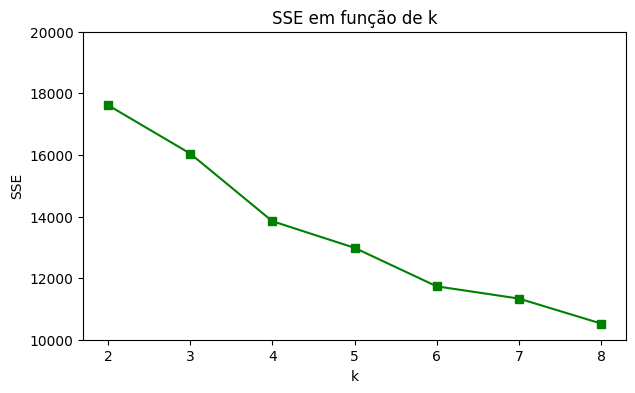

In [7]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler


minmax = MinMaxScaler()
norm_data = minmax.fit_transform(x)

erro = []

for i in range(2, 9):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42, max_iter=500)
    kmeans.fit(norm_data)
    erro.append(kmeans.inertia_)

print(erro)

plt.figure(figsize=(7, 4))
plt.plot(range(2, 9), erro, marker='s', color='green')
plt.title("SSE em função de k")
plt.xlabel("k")
plt.ylabel("SSE")
plt.ylim(10000, 20000)
plt.show()



<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; b. [1.5v] According to the previous plot, how many underlying customer segments
(clusters) should there be? Explain based on the trade-off between the clusters and
inertia.

Analisando o gráfico e usando o método "elbow finding", o k onde o declive estabiliza é k=4 e por isso devem existir 4 clusters. Aumentando o número de clusters, a inércia diminui, no entanto, corremos o risco de overfitting do modelo à training data e o modelo também se torna mais complexo, sem aumentar substancialmente o desempenho. Devemos escolher por isso o nº de clusters que mais diminui a inércia sem aumentar demasiado a complexidade do modelo.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; c. [1.5v] Would k-modes be a better clustering approach? Explain why based on the
dataset features.


Sim, o k-modes é uma opção melhor já que o dataset pussui muitas features categóricas, e k-means obriga algumas destas a ser representadas em variáveis binárias o que pode afetar negativamente as distâncias. Enquanto que o k-mean usa medidas de distância que resultam melhor para dados numéricos, o k-mode foi feito para features categóricas usando um procedimento baseado na frequência para atualizar os clusters e distancia de Hamming para calcular distâncias, evitando que as variáveis categóricas como "job" tenham de ser transformadas.

<h4> 2. Normalize the data using StandardScaler

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a. [1v] Apply PCA to the data. How much variability is explained by the top 2
components?

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std = StandardScaler()
norm_data = std.fit_transform(x)

pca = PCA(n_components=2)
pca_data = pca.fit(norm_data)
print(pca_data.explained_variance_ratio_)


[0.11679024 0.11075988]


Os top 2 componentes explicam 11,68% e 11,08% da variância

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.

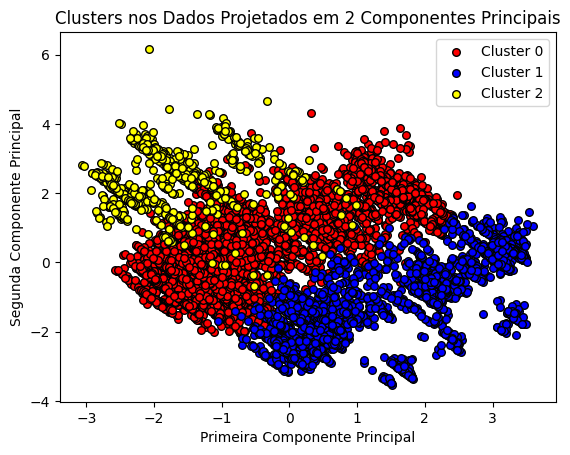

In [9]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(norm_data)
pca_data = pca_data.transform(norm_data)
colors = ['red', 'blue', 'yellow']
for i in range(3):  
    plt.scatter(
        pca_data[clusters == i, 0],  
        pca_data[clusters == i, 1],  
        color=colors[i],            
        label=f'Cluster {i}',
        edgecolor='k',               
        s=30                       
    )
plt.xlabel("Primeira Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.title("Clusters nos Dados Projetados em 2 Componentes Principais")
plt.legend() 
plt.show()

Existe uma separação clara entre os clusters porque as duas primeiras componentes principais capturam a maior parte da variação dos dados, incluindo as diferenças que o 
k-means utilizou para gerar os clusters.

<h5>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. [2v] Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use sns.displot
(see Data Exploration notebook),with multiple="dodge",stat='density',
shrink=0.8 and common_norm=False. Describe the main differences between the
clusters in no more than half a page.

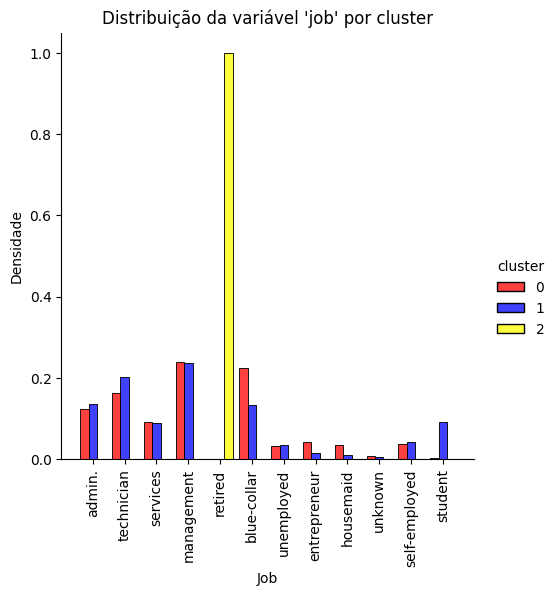

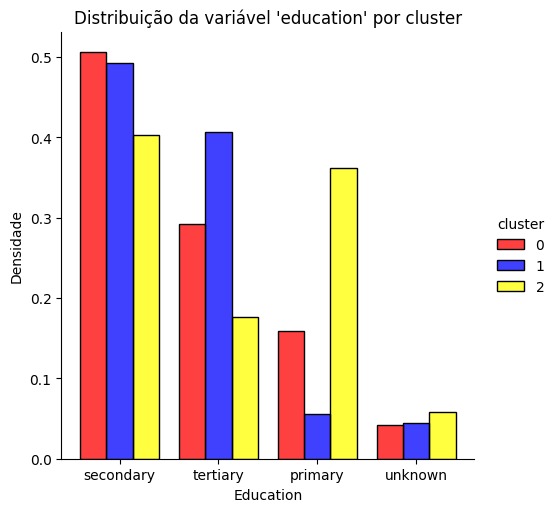

In [10]:
x_0['cluster'] = clusters  

sns.displot(
    data=x_0, x="job", hue="cluster", multiple="dodge",
    stat="density", shrink=0.8, common_norm=False,
    palette=colors
)
plt.title("Distribuição da variável 'job' por cluster")
plt.xlabel("Job")
plt.ylabel("Densidade")
plt.xticks(rotation=90)
plt.show()

sns.displot(
    data=x_0, x="education", hue="cluster", multiple="dodge",
    stat="density", shrink=0.8, common_norm=False,
    palette=colors
)
plt.title("Distribuição da variável 'education' por cluster")
plt.xlabel("Education")
plt.ylabel("Densidade")
plt.show()


Educação: Analisando a distribuição dos níveis de educação em cada cluster podemos concluir que todos são maioritariamente compostos por indivíduos com nível de educação secundária. O cluster 1 é praticamente todo composto por indivíduos com nível de educação mais elevada (secundária e terciária) enquanto que o cluster 2 é maioritariamente composto por indivíduos com um nível mais baixo de educação (primária e secundária). O cluster 0 também tem uma maior percentagem de pessoas com nível de educação elevada, mas não tanto como o cluster 1, pois possui ainda uma percentagem significativa de pessoas com educação primária.

Profissões: No gráfico com o título "Distribuição da variável 'job' por cluster", podemos observar que o cluster 2 é composto inteiramente por indivíduos reformados. Por contrapartida, os clusters 0 e 1 possuem uma distribuição mais variada de profissões. A única diferença notável entre os dois é que o cluster 1 possui mais indivíduos que estudam, enquanto que o cluster 0 não é composto por praticamente nenhuma pessoa que é estudante.

Concluindo, estas diferenças demonstram que o cluster 2 agrupa principalmente indivíduos reformados com menos educação, enquanto os clusters 0 e 1 contêm indivíduos em diversas profissões e com uma maior educação.
